二次元マップで中心にエージェントを仮想的に配置した
10個のランダムな距離と中心からの角度を生成し、それらを点P群とした
それらの点P群は距離は0～500cm(5m)で、角度は0～360°の値をとっている
それらの点P群を二次元マップに書き込んで表示している
さらに線を追加して中心からの距離を可視化

SQLiteを使用して、データベースによる情報の保持テストを開始した。
まずはデータベースを作成するプログラムを組んだ。
その中でもSQLファイルが存在しない環境下のみ動作するように変更を行った。
さらに、環境に変化を加え、SQLで作成するテーブルは２つ作成するようにした
１つ目は、knowledgeテーブルである。このテーブルでは、選択的知識の各々の知識が持つ原点からの距離rや角度θを保持するものである。
２つ目は、euclidean_distanceテーブルである。euclidean_distanceテーブルとは、知識間の活性化の値を保持するものであり、knowledgeテーブルに変更を加えた場合動作させる必要がある。
３つ目は、activity_valueテーブルである。activity_valueテーブルとは、全知識の活性値を保持するテーブルである。処理が回るたびに忘却の処理を施す必要がある。活性化などで数値を変化させていくテーブルはこのテーブルである。

In [1]:
import sqlite3

def SQL_SetUp():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データベースファイルが存在する場合は処理を終了
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    existing_tables = cursor.fetchall()
    if existing_tables:
        print("Database already exists. Exiting setup.")
        conn.close()
        return

    # テーブルを作成
    cursor.execute('''
        CREATE TABLE knowledge (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            angle FLOAT,
            distance FLOAT,
            activation FLOAT DEFAULT 0,
            description TEXT
        )
    ''')

    conn.commit()
    conn.close()

# データベースのセットアップ
SQL_SetUp()


In [2]:
import sqlite3

def SQL_InsertData():
    data = [
        ("直進", 320, 4, 0),
        ("右寄りの直進", 340, 2, 0),
        ("直進", 0, 1, 0),
        ("右寄りの直進", 20, 2, 0),
        ("直進", 40, 4, 0)
    ]

    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを挿入
    cursor.executemany("INSERT INTO knowledge (description, angle, distance, activation) VALUES (?, ?, ?, ?)", data)

    conn.commit()
    conn.close()

# データの挿入
SQL_InsertData()

In [3]:
import sqlite3

def SQL_AddData(description, angle, distance, activation):
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを挿入
    cursor.execute("INSERT INTO knowledge (description, angle, distance, activation) VALUES (?, ?, ?, ?)",
                   (description, angle, distance, activation))

    conn.commit()
    conn.close()

# データの追加
description = input("説明: ")
angle = float(input("角度: "))
distance = float(input("距離: "))
activation = float(0.0)

SQL_AddData(description, angle, distance, activation)


In [4]:
import sqlite3

def SQL_DisplayData():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得して表示
    cursor.execute("SELECT * FROM knowledge")
    rows = cursor.fetchall()
    for row in rows:
        print(row)

    conn.close()

# データの表示
SQL_DisplayData()


(1, 320.0, 4.0, 0.0, '直進')
(2, 340.0, 2.0, 0.0, '右寄りの直進')
(3, 0.0, 1.0, 0.0, '直進')
(4, 20.0, 2.0, 0.0, '右寄りの直進')
(5, 40.0, 4.0, 0.0, '直進')
(6, 180.0, 2.0, 0.0, '後退')


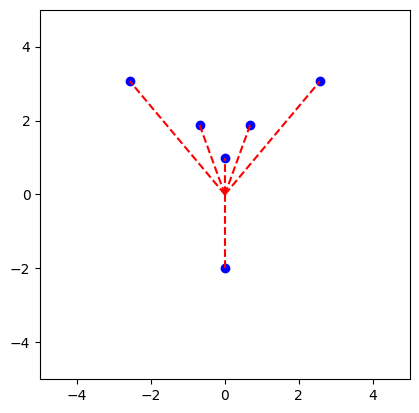

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

def plot_points():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得
    cursor.execute("SELECT angle, distance FROM knowledge")
    rows = cursor.fetchall()

    conn.close()

    # データを変換
    converted_points = []
    for angle, distance in rows:
        shifted_angle = angle + 90  # 角度を+90度ずらす
        x = distance * np.cos(np.deg2rad(shifted_angle))
        y = distance * np.sin(np.deg2rad(shifted_angle))
        converted_points.append((x, y))

    # 図にプロット
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # ポイントをプロット
    ax.scatter(*zip(*converted_points), c='b', marker='o')

    # 中心座標を計算
    center_x, center_y = 0, 0

    # 点と中心を線で結ぶ
    for point in converted_points:
        x, y = point
        ax.plot([center_x, x], [center_y, y], 'r--')

    plt.show()

# データのプロット
plot_points()


C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36914 (\N{CJK UNIFIED IDEOGRAPH-9032}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21491 (\N{CJK UNIFIED IDEOGRAPH-53F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12426 (\N{HIRAGANA

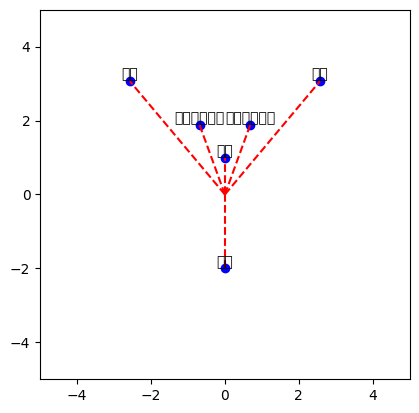

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

def plot_points():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得
    cursor.execute("SELECT description, angle, distance FROM knowledge")
    rows = cursor.fetchall()

    conn.close()

    # データを変換
    converted_points = []
    descriptions = []
    for description, angle, distance in rows:
        shifted_angle = angle + 90  # 角度を+90度ずらす
        x = distance * np.cos(np.deg2rad(shifted_angle))
        y = distance * np.sin(np.deg2rad(shifted_angle))
        converted_points.append((x, y))
        descriptions.append(description)

    # 図にプロット
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # ポイントをプロット
    scatter = ax.scatter(*zip(*converted_points), c='b', marker='o')

    # 中心座標を計算
    center_x, center_y = 0, 0

    # 点と中心を線で結ぶ
    for point, description in zip(converted_points, descriptions):
        x, y = point
        ax.plot([center_x, x], [center_y, y], 'r--')
        ax.text(x, y, description, ha='center', va='bottom')

    plt.show()

# データのプロット
plot_points()


Using font: Yu Gothic


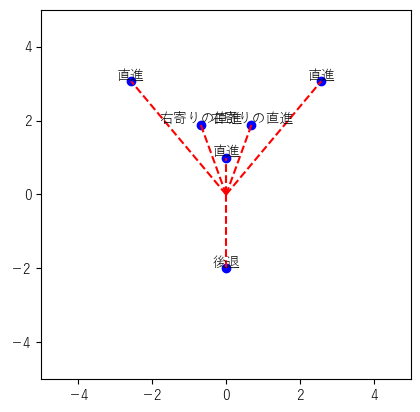

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from matplotlib.font_manager import findfont, FontProperties

def find_available_font(fonts):
    for font in fonts:
        if findfont(FontProperties(family=font)):
            return font
    return None

def plot_points():
    # 使用可能なフォントを検索し、先頭のフォントを取得
    fonts = ['Yu Gothic', 'Meiryo', 'MS Gothic', 'SimHei', 'WenQuanYi Micro Hei', 'Lohit Devanagari']
    font_family = find_available_font(fonts)

    if not font_family:
        print("No suitable font found. Exiting...")
        return

    # フォントのパスを設定
    plt.rcParams['font.family'] = font_family

    print("Using font:", font_family)

    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得
    cursor.execute("SELECT description, angle, distance FROM knowledge")
    rows = cursor.fetchall()

    conn.close()

    # データを変換
    converted_points = []
    descriptions = []
    for description, angle, distance in rows:
        shifted_angle = angle + 90  # 角度を+90度ずらす
        x = distance * np.cos(np.deg2rad(shifted_angle))
        y = distance * np.sin(np.deg2rad(shifted_angle))
        converted_points.append((x, y))
        descriptions.append(description)

    # 図にプロット
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # ポイントをプロット
    scatter = ax.scatter(*zip(*converted_points), c='b', marker='o')

    # 中心座標を計算
    center_x, center_y = 0, 0

    # 点と中心を線で結ぶ
    for point, description in zip(converted_points, descriptions):
        x, y = point
        ax.plot([center_x, x], [center_y, y], 'r--')
        ax.text(x, y, description, ha='center', va='bottom')

    plt.show()

# データのプロット
plot_points()


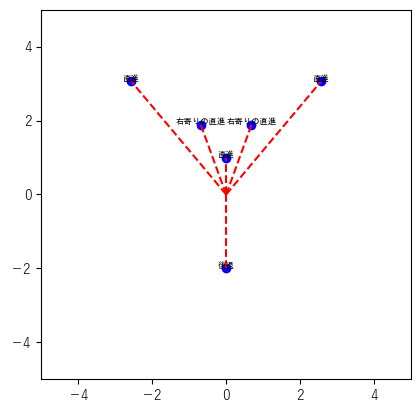

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from matplotlib.font_manager import FontProperties

def plot_points():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得
    cursor.execute("SELECT description, angle, distance FROM knowledge")
    rows = cursor.fetchall()

    conn.close()

    # データを変換
    converted_points = []
    descriptions = []
    for description, angle, distance in rows:
        shifted_angle = angle + 90  # 角度を+90度ずらす
        x = distance * np.cos(np.deg2rad(shifted_angle))
        y = distance * np.sin(np.deg2rad(shifted_angle))
        converted_points.append((x, y))
        descriptions.append(description)

    # 図にプロット
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # MS Gothicフォントを読み込む
    font_prop = FontProperties(fname=r'C:\Windows\Fonts\msgothic.ttc', size=12)

    # ポイントをプロット
    scatter = ax.scatter(*zip(*converted_points), c='b', marker='o')

    # 中心座標を計算
    center_x, center_y = 0, 0

    # 点と中心を線で結ぶ
    for point, description in zip(converted_points, descriptions):
        x, y = point
        ax.plot([center_x, x], [center_y, y], 'r--')
        ax.text(x, y, description, ha='center', va='bottom', fontproperties=font_prop)

    plt.show()

# データのプロット
plot_points()


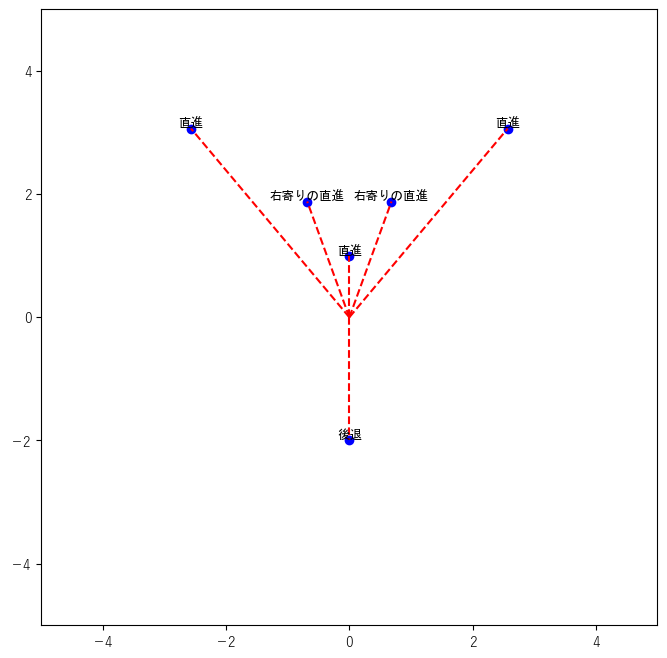

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from matplotlib.font_manager import FontProperties

def plot_points():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得
    cursor.execute("SELECT description, angle, distance FROM knowledge")
    rows = cursor.fetchall()

    conn.close()

    # データを変換
    converted_points = []
    descriptions = []
    for description, angle, distance in rows:
        shifted_angle = angle + 90  # 角度を+90度ずらす
        x = distance * np.cos(np.deg2rad(shifted_angle))
        y = distance * np.sin(np.deg2rad(shifted_angle))
        converted_points.append((x, y))
        descriptions.append(description)

    # 図にプロット
    fig, ax = plt.subplots(figsize=(8, 8))  # グラフのサイズを設定
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # MS Gothicフォントを読み込む
    font_prop = FontProperties(fname=r'C:\Windows\Fonts\msgothic.ttc', size=9)

    # ポイントをプロット
    scatter = ax.scatter(*zip(*converted_points), c='b', marker='o')

    # 中心座標を計算
    center_x, center_y = 0, 0

    # 点と中心を線で結ぶ
    for point, description in zip(converted_points, descriptions):
        x, y = point
        ax.plot([center_x, x], [center_y, y], 'r--')
        ax.text(x, y, description, ha='center', va='bottom', fontproperties=font_prop)

    plt.show()

# データのプロット
plot_points()
